---
title: "Anomaly/outlier detection"
author: "Barry Menglong Yao"
date: "2023-11-29"
format:
  html:
    code-fold: false
categories: [news, code, analysis]

jupyter: python3
---

Anomaly/outlier detection

Mean Absolute Error: 3.92 degrees.
Accuracy: 93.76 %.


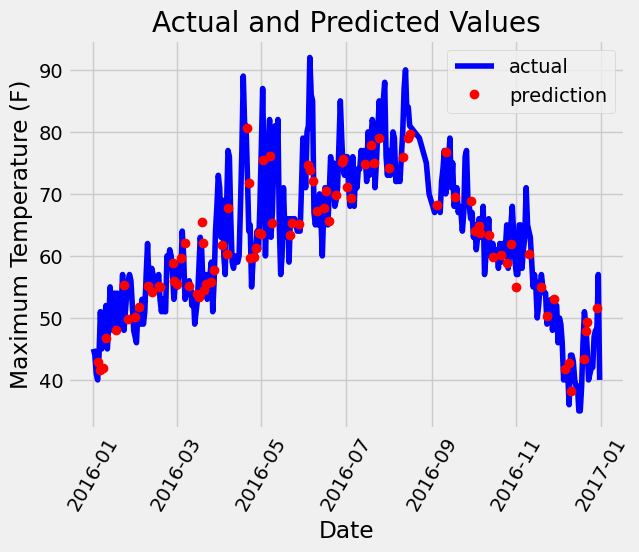

In [6]:
# Pandas is used for data manipulation
import pandas as pd
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
import numpy as np
 
    

def predict_by_random_forest(train_features, test_features, train_labels,feature_list):
    # New random forest with only the two most important variables
    rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)
    # Extract the two most important features
    important_indices = [feature_list.index('temp_1'), feature_list.index('average')]
    train_important = train_features[:, important_indices]
    test_important = test_features[:, important_indices]
    # Train the random forest
    rf_most_important.fit(train_important, train_labels)
    # Make predictions and determine the error
    predictions = rf_most_important.predict(test_important)
    return predictions


def show_plot(features,feature_list,test_features,labels,predictions,test_labels):
    errors = abs(predictions - test_labels)
    # Display the performance metrics
    print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
    mape = np.mean(100 * (errors / test_labels))
    accuracy = 100 - mape
    print('Accuracy:', round(accuracy, 2), '%.')
    
    # Set the style
    plt.style.use('fivethirtyeight')
    # Use datetime for creating date objects for plotting
    import datetime
    # Dates of training values
    months = features[:, feature_list.index('month')]
    days = features[:, feature_list.index('day')]
    years = features[:, feature_list.index('year')]
    # List and then convert to datetime object
    dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
    dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]
    # Dataframe with true values and dates
    true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})
    # Dates of predictions
    months = test_features[:, feature_list.index('month')]
    days = test_features[:, feature_list.index('day')]
    years = test_features[:, feature_list.index('year')]
    # Column of dates
    test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
    # Convert to datetime objects
    test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]
    # Dataframe with predictions and dates
    predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})
    # Plot the actual values
    plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')
    # Plot the predicted values
    plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
    plt.xticks(rotation = 60); 
    plt.legend()
    # Graph labels
    plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual and Predicted Values')
    
    
# Read in data and display first 5 rows
features = pd.read_csv('temps.csv')
features.head(5)

# One-hot encode the data using pandas get_dummies
features = pd.get_dummies(features)
# Use numpy to convert to arrays

# Labels are the values we want to predict
labels = np.array(features['actual'])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('actual', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
predictions=predict_by_random_forest(train_features, test_features, train_labels,feature_list)

show_plot(features,feature_list,test_features,labels,predictions,test_labels)

LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

Mean Absolute Error: 3.42 degrees.
Accuracy: 94.63 %.


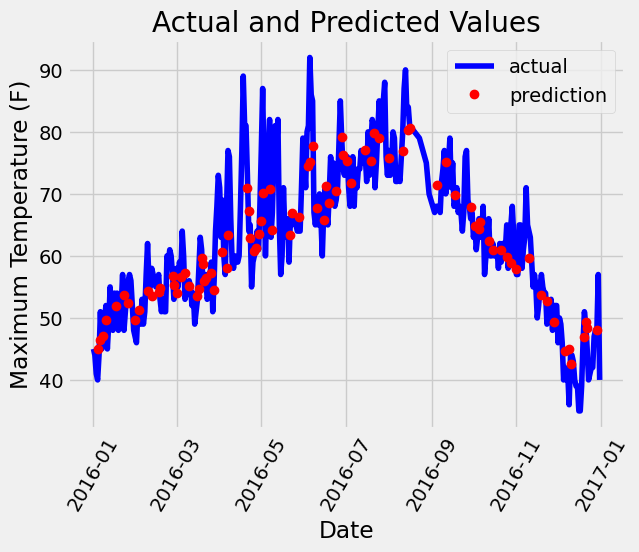

In [7]:
from sklearn.linear_model import LinearRegression


# Extract the two most important features
important_indices = [feature_list.index('temp_1'), feature_list.index('average')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]
# Train the random forest
reg = LinearRegression().fit(train_important, train_labels)
# Make predictions and determine the error
predictions = reg.predict(test_important)
show_plot(features,feature_list,test_features,labels,predictions,test_labels)